In [9]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/boosuro/profit_estimation_of_companies/master/1000_Companies.csv')
df

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.800,471784.1000,New York,192261.83000
1,162597.70,151377.590,443898.5300,California,191792.06000
2,153441.51,101145.550,407934.5400,Florida,191050.39000
3,144372.41,118671.850,383199.6200,New York,182901.99000
4,142107.34,91391.770,366168.4200,Florida,166187.94000
...,...,...,...,...,...
995,54135.00,118451.999,173232.6695,California,95279.96251
996,134970.00,130390.080,329204.0228,California,164336.60550
997,100275.47,241926.310,227142.8200,California,413956.48000
998,128456.23,321652.140,281692.3200,California,333962.19000


In [10]:
df=df.sample(3)
df

,R&D Spend,Administration,Marketing Spend,State,Profit
962,143258.0,131614.0896,345195.7414,California,171416.97240
864,26618.0,114388.1631,120138.5429,New York,71772.42685
520,25140.0,114169.8853,117286.7378,New York,70509.78421


In [11]:
df.drop(columns=["State"],inplace=True)

In [12]:
df

,R&D Spend,Administration,Marketing Spend,Profit
962,143258.0,131614.0896,345195.7414,171416.97240
864,26618.0,114388.1631,120138.5429,71772.42685
520,25140.0,114169.8853,117286.7378,70509.78421


In [14]:
df["f0"]=df["Profit"].mean()

In [15]:
df

,R&D Spend,Administration,Marketing Spend,Profit,f0
962,143258.0,131614.0896,345195.7414,171416.97240,104566.394487
864,26618.0,114388.1631,120138.5429,71772.42685,104566.394487
520,25140.0,114169.8853,117286.7378,70509.78421,104566.394487


In [16]:
df=round(df/1000)

In [17]:
df

,R&D Spend,Administration,Marketing Spend,Profit,f0
962,143.0,132.0,345.0,171.0,105.0
864,27.0,114.0,120.0,72.0,105.0
520,25.0,114.0,117.0,71.0,105.0


In [18]:
df["ri1"]=df["Profit"]-df["f0"]

In [19]:
df

,R&D Spend,Administration,Marketing Spend,Profit,f0,ri1
962,143.0,132.0,345.0,171.0,105.0,66.0
864,27.0,114.0,120.0,72.0,105.0,-33.0
520,25.0,114.0,117.0,71.0,105.0,-34.0


In [20]:
from sklearn.tree import DecisionTreeRegressor

In [21]:
dt1=DecisionTreeRegressor(max_depth=1)

In [27]:
df.iloc[:,-1]

962    66.0
864   -33.0
520   -34.0
Name: ri1, dtype: float64

In [25]:
dt1.fit(df.iloc[:,0:3].values,df.iloc[:,-1].values)

DecisionTreeRegressor(max_depth=1)

[Text(0.5, 0.75, 'x[0] <= 85.0\nsquared_error = 2200.222\nsamples = 3\nvalue = -0.333'),
 Text(0.25, 0.25, 'squared_error = 0.25\nsamples = 2\nvalue = -33.5'),
 Text(0.375, 0.5, 'True  '),
 Text(0.75, 0.25, 'squared_error = 0.0\nsamples = 1\nvalue = 66.0'),
 Text(0.625, 0.5, '  False')]

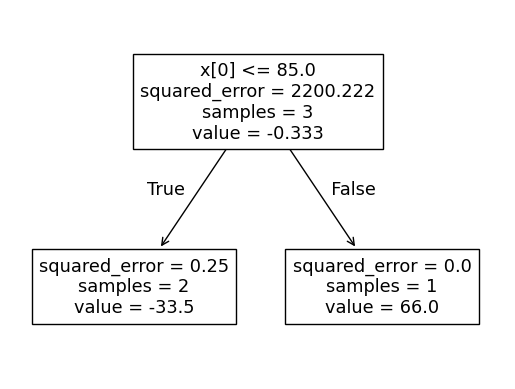

In [26]:
from sklearn.tree import plot_tree
plot_tree(dt1)